<a href="https://colab.research.google.com/github/AliceRai/Portfolio/blob/main/Analisi_disastri_aerei_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [ ]:
file=pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")
file

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [ ]:
file.info()  #verifichiamo i tipi di dati che contiene il dataframe e vediamo che sono tutti di tipo "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
file.isnull().sum()   #vediamo se il dataframe contiene valori nulli o mancanti

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [ ]:
#convertiamo la colonna "date" in formato datetime
file["date"]=pd.to_datetime(file["date"], errors="coerce", format='%d-%b-%Y')

#estraiamo dalla colonna "date" il valore dell'anno
file['year']=file["date"].dt.year

file

,date,type,registration,operator,fatalities,location,country,cat,year
0,NaT,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
1,NaT,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
2,NaT,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
3,NaT,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,NaN
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023.0
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023.0
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023.0
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023.0


In [ ]:
#nella colonna fatalities sono presenti dei valori da sommare

def eval_expr(expr):
    """la funzione riconosce le operazioni nella colonna e le esegue"""
    try:
        return eval(expr)
    except:
        return None

file['fatalities'] = file['fatalities'].apply(eval_expr)  #applichiamo la funzione alla colonna fatalities
file["fatalities"]=pd.to_numeric(file["fatalities"])  #convertiamo la colonna fatalities in un float


print(file.dtypes)  #verifichiamo se le conversioni sono riuscite

file

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities             float64
location                object
country                 object
cat                     object
year                   float64
dtype: object


,date,type,registration,operator,fatalities,location,country,cat,year
0,NaT,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
1,NaT,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
2,NaT,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
3,NaT,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,NaN
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023.0
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023.0
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023.0
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023.0


In [ ]:
#file=file.drop_duplicates()   #non rimuoviamo i duplicati


,date,type,registration,operator,fatalities,location,country,cat,year
0,NaT,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
1,NaT,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
2,NaT,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,NaN
3,NaT,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,NaN
...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023.0
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023.0
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023.0
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023.0


In [ ]:
file.isna().sum() #ricontrolliamo i valori nulli

date             546
type               0
registration    1432
operator           4
fatalities      3831
location         931
country            0
cat                0
year             546
dtype: int64

= L'ANALISI DEI DATI =

IN QUALE NAZIONE SONO VERIFICATI PIU' INCIDENTI?

In [ ]:
#raggruppiamo i dati per "country" e ordiniamo in modo decrescente per il conteggio della categoria.
#CAT è un dato presente in ogni riga e possiamo utilizzarlo per contare le ricorrenze

grouped_country=file.groupby(["country"])
country_higher_accidents=grouped_country.count().sort_values("cat", ascending=False)

print(country_higher_accidents["cat"].head())

print("La tabella mostra i 5 paesi con il maggior numero di incidenti. La nazione dove si sono verificati il maggior numero "
     "di incidenti è l'America.")

country
USA                4376
Russia             1416
Unknown country     838
U.K.                837
Canada              825
Name: cat, dtype: int64
La tabella mostra i 5 paesi con il maggior numero di incidenti. La nazione dove si sono verificati il maggior numero di incidenti è l'America.


COME E' VARIATO IL NUMERO DI INCIDENTI NEL TEMPO?

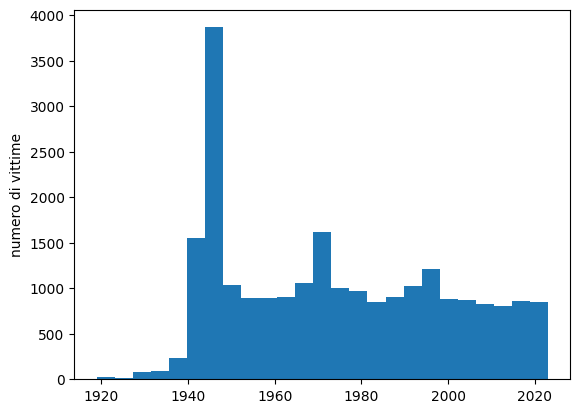

Il grafico mostra chiaramente un picco posizionato poco dopo gil anni 40, questo può essere dovuto al maggior numero di incidenti aerei registriati durante la Seconda Guerra Mondiale


In [ ]:
#creiamo un istogramma che ci mostri la frequenza degli incidenti nel corso degli anni.
bins=25
plt.hist(file["year"], bins=bins)
plt.ylabel("numero di vittime")
plt.show()
print("Il grafico mostra chiaramente un picco posizionato poco dopo gil anni 40, questo può essere dovuto "
      "al maggior numero di incidenti aerei registriati durante la Seconda Guerra Mondiale")

QUAL E' STATO L'INCIDENTE PIU' GRAVE?

In [ ]:
# Proviamo ad ipotizzare che durante la guerra si sia verificato l'incidente più grave,
#quindi troviamo l'incidente con il maggior numero di morti
max_fatalities_index = file['fatalities'].idxmax()
row_with_max_fatalities = file.loc[max_fatalities_index]

print(row_with_max_fatalities)
print("L'incidente più grave è invece quello registrato l'11 settembre 2001")

date            2001-09-11 00:00:00
type               Boeing 767-223ER
registration                 N334AA
operator          American Airlines
fatalities                   1692.0
location               New York, NY
country                         USA
cat                              H1
year                         2001.0
Name: 19403, dtype: object
L'incidente più grave è invece quello registrato l'11 settembre 2001


QUALE TIPO DI VEIVOLO HA CAUSATO PIU' MORTI?

In [ ]:
#raggruppiamo i dati per tipo di veivolo e mostriamo la somma di fatalities in ordine crescente
grouped_type=file.groupby(["type"])
type_higher_fatalities=grouped_type.sum("fatalities").sort_values("fatalities", ascending=False).head()

type_higher_fatalities_res=type_higher_fatalities.reset_index()  #creiammo un indice per rendere "type" un colonna a cui possiamo accedere
type_higher_fatalities_res

,type,fatalities,year
0,Douglas C-47A (DC-3),5780.0,3706273.0
1,Douglas C-47 (DC-3),2676.0,1292722.0
2,Douglas C-47B (DC-3),2017.0,1145809.0
3,Boeing 767-223ER,1692.0,4007.0
4,Tupolev Tu-154M,1600.0,66007.0


Il veivolo che ha causato più morti è  Douglas C-47A (DC-3) con 5780.0 vittime,questo veivolo è stato uno dei mezzi più impiegati durante la Seconda Guerra Mondiale.


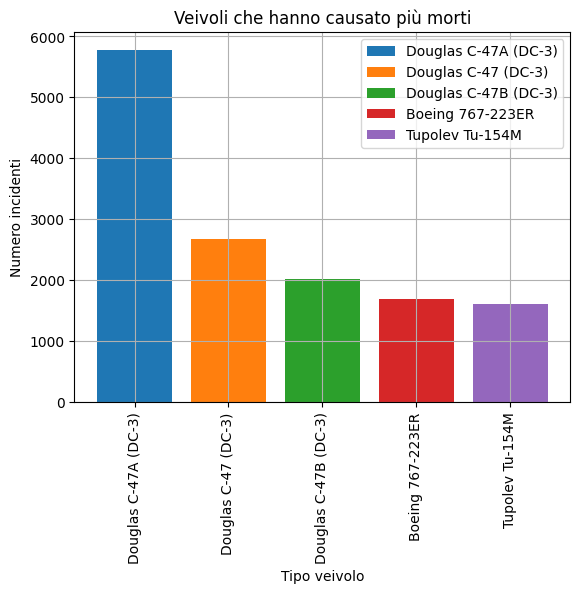

In [ ]:

#creiamo un grafico a barre partendo dai valori raggruppati
for i in range(5):
    plt.bar(type_higher_fatalities_res["type"].iloc[i],type_higher_fatalities_res["fatalities"].iloc[i], label=type_higher_fatalities_res["type"].iloc[i])

plt.title("Veivoli che hanno causato più morti")
plt.xlabel("Tipo veivolo")
plt.ylabel("Numero incidenti")
plt.xticks(rotation=90)
plt.legend()
plt.grid()

print("Il veivolo che ha causato più morti è ", type_higher_fatalities_res["type"].iloc[0],"con", type_higher_fatalities_res["fatalities"].iloc[0], "vittime,"
"questo veivolo è stato uno dei mezzi più impiegati durante la Seconda Guerra Mondiale.")

GLI INCIDENDENTI AVVENGONO PIU' DI FREQUENTE DURANTE DETERMINATI GIORNI DELLA SETTIMANA?

In [ ]:
#partendo dalla colonna "date" con il metodo dt.day_name troviamo il giorno della settimana corrispondente
file['day_of_week'] = file['date'].dt.day_name()
file

<ipython-input-14-b8fdaf6d307d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['day_of_week'] = file['date'].dt.day_name()


,date,type,registration,operator,fatalities,location,country,cat,year,day_of_week
0,NaT,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,NaN,NaN
1,NaT,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,NaN,NaN
2,NaT,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,NaN,NaN
3,NaT,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN,NaN
4,NaT,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023.0,Thursday
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023.0,Thursday
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023.0,Friday
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023.0,Sunday


In [ ]:
file["day_of_week"].value_counts()


day_of_week
Friday       3609
Thursday     3513
Wednesday    3491
Tuesday      3443
Monday       3310
Saturday     3184
Sunday       2753
Name: count, dtype: int64

In [ ]:
#ragguppiamo il DataFrame per i giorni della settimana e contiamo le ricorrenze. Ordiniamo per numero di morti.
day_week_grouped=file.groupby(["day_of_week"])
day_week_higher_accidents=day_week_grouped.count().sort_values("fatalities")

day_week_higher_accidents_res=day_week_higher_accidents.reset_index()  #creamo un nuovo indice per avere "day_of_week" come colonna
day_week_higher_accidents

,date,type,registration,operator,fatalities,location,country,cat,year
day_of_week,,,,,,,,,
Sunday,2753,2753,2632,2753,2322,2677,2753,2753,2753
Saturday,3184,3184,2986,3183,2656,3077,3184,3184,3184
Monday,3310,3310,3111,3309,2803,3204,3310,3310,3310
Tuesday,3443,3443,3245,3443,2941,3335,3443,3443,3443
Thursday,3513,3513,3310,3513,3000,3403,3513,3513,3513
Wednesday,3491,3491,3302,3490,3007,3380,3491,3491,3491
Friday,3609,3609,3324,3608,3064,3489,3609,3609,3609


Il grafico ci mostra che gli incidenti sono meno frequenti nel weekend, probabilmente perché durante la settimana le persone si spostano maggiormente per lavoro.


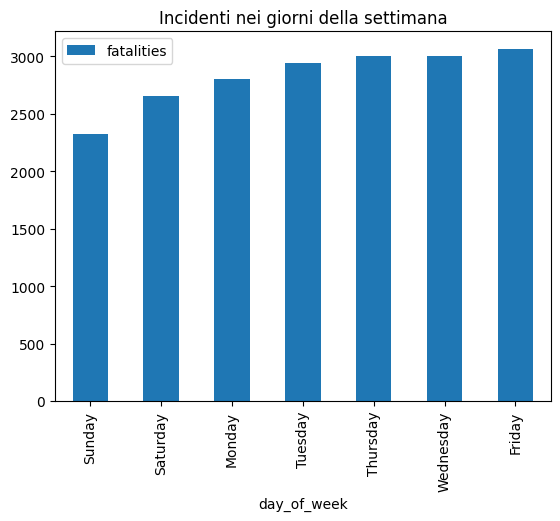

In [ ]:
#creiamo un barchart
day_week_higher_accidents_res.plot(kind="bar", x="day_of_week", y="fatalities")
plt.title("Incidenti nei giorni della settimana")
print("Il grafico ci mostra che gli incidenti sono meno frequenti nel weekend, probabilmente perché durante la settimana "
            "le persone si spostano maggiormente per lavoro.")
plt.show()


COME SI SONO EVOLUTI GLI INCIDENTI DOPO L'11 SETTEMBRE 2001?

In [ ]:
#creiamo una maskera per filtrare solo i dati degli incidenti dopo l'11-9-01
reference_date=pd.to_datetime("2001-9-11")  #impostiamo la data di riferimento
date_mask=file["date"] > reference_date    #creiamo il filtro e poi lo applichiamo al dataframe
file_after_1109=file[date_mask]
file_after_1109

,date,type,registration,operator,fatalities,location,country,cat,year,day_of_week
19407,2001-09-12,Let L-410UVP-E,XA-ACM,Aero Ferinco,19.0,near ChichÃ©n ItzÃ¡ A...,Mexico,A1,2001.0,Wednesday
19408,2001-09-12,DHC-3T Vazar Turbine Otter,C-FQOS,Labrador Airways,0.0,Goose (Otter Cre...,Canada,A1,2001.0,Wednesday
19409,2001-09-14,Beech 1900C,C-GSKC,SkyLink Express,0.0,St. John's Airpo...,Canada,A1,2001.0,Friday
19410,2001-09-15,Fokker 100,PT-MRN,TAM Brasil,1.0,"near Belo Horizonte, MG",Brazil,A2,2001.0,Saturday
19411,2001-09-16,Boeing 737-2C3,PP-CJN,Varig,0.0,GoiÃ¢nia-Santa G...,Brazil,A1,2001.0,Sunday
...,...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023.0,Thursday
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023.0,Thursday
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023.0,Friday
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023.0,Sunday


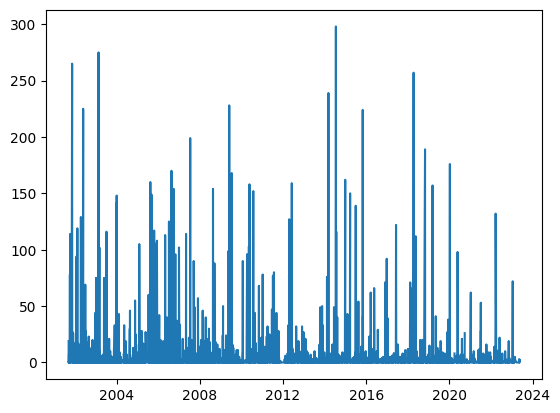

Il grafico non è molto indicativo di un trend quindi proviamo a analizzare i dati per anno


In [ ]:
#creiamo un grafico partendo dai dati filtrati per una prima valutazione
plt.plot(file_after_1109["date"],file_after_1109["fatalities"])
plt.show()
print("Il grafico non è molto indicativo di un trend quindi proviamo a analizzare i dati per anno")


In [ ]:
#raggruppiamo i dati per anno e contiamo le ricorrenze
year_grouped=file_after_1109.groupby(["year"])
accident_per_year=year_grouped.count()
accident_per_year.head()


,date,type,registration,operator,fatalities,location,country,cat,day_of_week
year,,,,,,,,,
2001.0,73,73,72,73,73,72,73,73,73
2002.0,221,221,212,221,221,221,221,221,221
2003.0,218,218,211,218,215,216,218,218,218
2004.0,209,209,204,209,207,206,209,209,209
2005.0,219,219,215,219,219,219,219,219,219


In [ ]:
accident_per_year_res=accident_per_year.reset_index()   #impostiamo l'indice
accident_per_year_res.head()

,year,date,type,registration,operator,fatalities,location,country,cat,day_of_week
0,2001.0,73,73,72,73,73,72,73,73,73
1,2002.0,221,221,212,221,221,221,221,221,221
2,2003.0,218,218,211,218,215,216,218,218,218
3,2004.0,209,209,204,209,207,206,209,209,209
4,2005.0,219,219,215,219,219,219,219,219,219


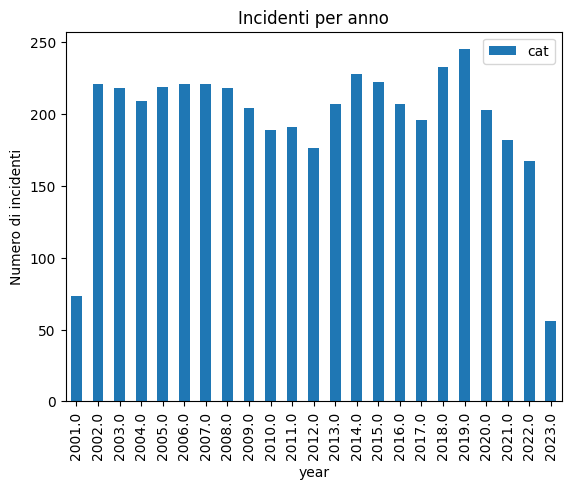

Anche in questo caso non abbiamo un risultato soddifacente, pertanto proseguiamo l'analisi e invece di contare gli incidenti lavoriamo sul numero di morti


In [ ]:
accident_per_year_res=accident_per_year.reset_index()   #impostiamo l'indice
accident_per_year_res.plot(kind="bar", x="year", y="cat")
plt.title("Incidenti per anno")
plt.ylabel("Numero di incidenti")
plt.show()

print("Anche in questo caso non abbiamo un risultato soddifacente, pertanto proseguiamo l'analisi e invece di "
     "contare gli incidenti lavoriamo sul numero di morti")

In [ ]:
#raggruppiamo i dati per anno e mostriamo la somma del numero di morti
year_grouped=file_after_1109.groupby(["year"])
accident_per_year_fat=year_grouped.sum("fatalities")
accident_per_year_fat_res=accident_per_year_fat.reset_index()   #impostiamo l'indice
accident_per_year_fat_res.head()

,year,fatalities
0,2001.0,642.0
1,2002.0,1302.0
2,2003.0,1130.0
3,2004.0,678.0
4,2005.0,1352.0


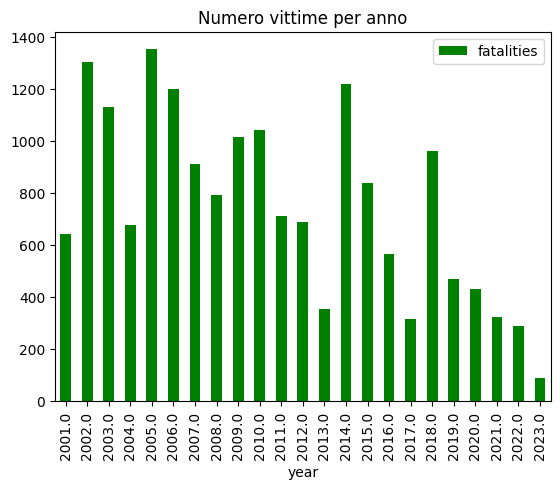

Questa volta il grafico mostra una tendenza descrescente


In [ ]:
accident_per_year_fat_res.plot(kind="bar", x="year", y="fatalities", color="green")
plt.title("Numero vittime per anno")
plt.show()

print("Questa volta il grafico mostra una tendenza descrescente")

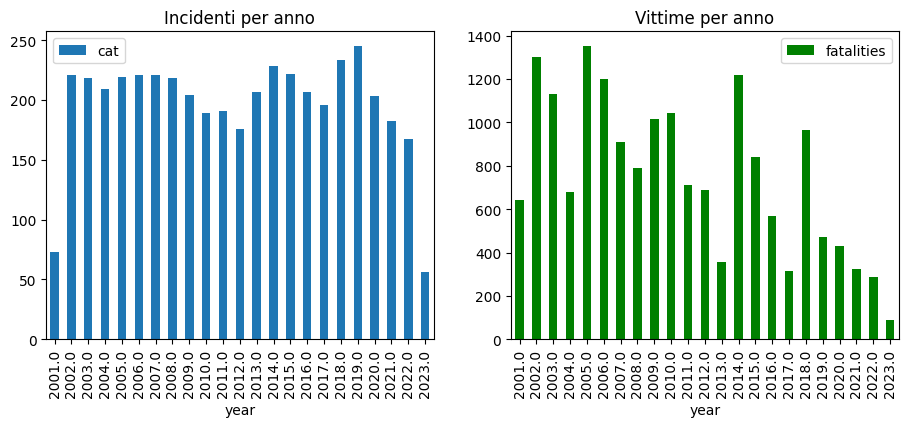

Il confronto tra i due grafici ci mostra che, sebbene dopo l'11 settembre il numero di incidenti non sia drasticamente diminuito, il numero di vittime mostra una tendenza in diminuzione.


In [ ]:
plt.subplot(1,2,1)
accident_per_year_res.plot(kind="bar", x="year", y="cat", ax=plt.gca())
plt.title("Incidenti per anno")

plt.subplot(1,2,2)
accident_per_year_fat_res.plot(kind="bar", x="year", y="fatalities", figsize=(11, 4), color="green", ax=plt.gca())
plt.title("Vittime per anno")
plt.show()

print("Il confronto tra i due grafici ci mostra che, sebbene dopo l'11 settembre il numero di incidenti non sia drasticamente "
     "diminuito, il numero di vittime mostra una tendenza in diminuzione.")

QUALI SONO GLI OPERATORI PIù SICURI?

In [ ]:
#per operatori sicuri ho considerato gli operatori con meno incidenti e meno morti
operator_group=file.groupby("operator")
best_operator=operator_group["fatalities"].sum().sort_values()
best_operator

operator
Jet24                                       0.0
Loftleidir, op.for Seaboard & Western       0.0
Loganair, op.for Flybe                      0.0
Lonnie Russell Leasing & Rental             0.0
Loren Davis Ministries                      0.0
                                          ...  
RAF                                      2632.0
US Navy                                  2849.0
American Airlines                        3164.0
USAAF                                    4616.0
USAF                                     5905.0
Name: fatalities, Length: 6017, dtype: float64

INCIDENTI PER CATEGORIA

In [ ]:
cat_group=file.groupby(["cat"])   #raggruppiamo per categoria e contiamo il numero di vittime
accidents_per_cat=cat_group["fatalities"].count().reset_index()
accidents_per_cat

,cat,fatalities
0,A1,14352
1,A2,2471
2,C1,966
3,C2,84
4,H1,42
5,H2,1045
6,I1,3
7,I2,12
8,O1,940
9,O2,64


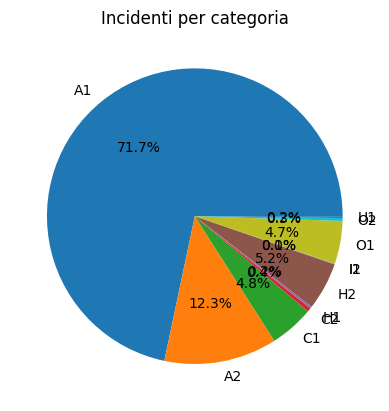

Il grafico a torta mostra che la maggior parte degli incidenti con vittime è di categoria A1


In [ ]:
fig, ax = plt.subplots()
ax.pie(accidents_per_cat["fatalities"], labels=accidents_per_cat["cat"],
       autopct='%1.1f%%')
plt.title("Incidenti per categoria")
plt.show()
print("Il grafico a torta mostra che la maggior parte degli incidenti con vittime è di categoria", accidents_per_cat.iloc[0][0])